The data was downloaded from https://power.larc.nasa.gov/data-access-viewer/.
I picked a few parameters which i decided will be useful for temperature prediction (11 parameters).
Data is 5 years period from 2015 to 2019 including both dates.
Idea is to predict temperature in my vilage for next 3 days.

As i have learnt from internet, for predictions for more then 3 days, i would need to take into
 considerations wheater in different contitents, thats why i assume it's not doable
  for small project with limmited amount of data.

unforcunetly in the server there is no information about rain, which may greatly impact on
weather temperature, but let's try to make model with just humidity :)

In [258]:
# get the needed libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [259]:
#get data file
# data starts from row 21 (column names and later data)
raw_data = pd.read_csv('POWER_SinglePoint_Daily_20150101_20200101.csv', skiprows = 20)

In [260]:
# check the data
print("""meaning of columns:\n
T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C)
PS MERRA2 1/2x1/2 Surface Pressure (kPa)
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C)
TS MERRA2 1/2x1/2 Earth Skin Temperature (C)
WS10M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)
RH2M MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)
WS10M MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
WS50M MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
WS50M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)
ALLSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)
CLRSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 Clear Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)
""")

meaning of columns:

T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C)
PS MERRA2 1/2x1/2 Surface Pressure (kPa)
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C)
TS MERRA2 1/2x1/2 Earth Skin Temperature (C)
WS10M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)
RH2M MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)
WS10M MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
WS50M MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
WS50M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)
ALLSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)
CLRSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 Clear Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)



In [261]:
raw_data.head()

,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2M,RH2M,PS,WS50M,WS10M,WS50M_RANGE,WS10M_RANGE,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,50.12151,22.00971,2015,1,1,5.45,-1.88,-1.75,92.09,100.07,8.06,6.16,1.74,0.88,-999.00,0.30
1,50.12151,22.00971,2015,1,2,4.27,-0.52,-0.16,90.06,99.25,11.16,8.53,4.60,4.15,0.96,0.59
2,50.12151,22.00971,2015,1,3,2.99,0.62,1.21,86.11,98.71,13.33,9.91,3.80,3.08,-999.00,0.50
3,50.12151,22.00971,2015,1,4,2.93,-0.47,-0.07,85.74,98.11,12.03,9.02,3.32,2.80,-999.00,0.55
4,50.12151,22.00971,2015,1,5,3.39,-1.38,-1.14,83.99,98.86,10.64,8.00,4.44,4.08,-999.00,0.49


In [262]:
# the CLRSKY_SFC_SW_DWN column has some "-999" values, lets drop this column
print(raw_data.columns)
raw_data = raw_data.drop(['CLRSKY_SFC_SW_DWN'], axis=1)
raw_data.head()

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'T2M_RANGE', 'TS', 'T2M', 'RH2M',
       'PS', 'WS50M', 'WS10M', 'WS50M_RANGE', 'WS10M_RANGE',
       'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN'],
      dtype='object')


,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2M,RH2M,PS,WS50M,WS10M,WS50M_RANGE,WS10M_RANGE,ALLSKY_SFC_SW_DWN
0,50.12151,22.00971,2015,1,1,5.45,-1.88,-1.75,92.09,100.07,8.06,6.16,1.74,0.88,0.30
1,50.12151,22.00971,2015,1,2,4.27,-0.52,-0.16,90.06,99.25,11.16,8.53,4.60,4.15,0.59
2,50.12151,22.00971,2015,1,3,2.99,0.62,1.21,86.11,98.71,13.33,9.91,3.80,3.08,0.50
3,50.12151,22.00971,2015,1,4,2.93,-0.47,-0.07,85.74,98.11,12.03,9.02,3.32,2.80,0.55
4,50.12151,22.00971,2015,1,5,3.39,-1.38,-1.14,83.99,98.86,10.64,8.00,4.44,4.08,0.49


In [263]:
#basic analyzis of data:
values_data = raw_data[['T2M_RANGE', 'TS', 'T2M', 'RH2M', 'PS', 'WS50M', 'WS10M', 'WS50M_RANGE', 'WS10M_RANGE', 'ALLSKY_SFC_SW_DWN']]
values_data.describe()

,T2M_RANGE,TS,T2M,RH2M,PS,WS50M,WS10M,WS50M_RANGE,WS10M_RANGE,ALLSKY_SFC_SW_DWN
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,9.113284,9.598046,9.532895,76.265906,98.882912,6.123903,4.219732,4.376700,3.423388,1.248041
std,3.595447,9.674677,9.315266,13.990556,0.768321,2.276713,1.722267,1.820713,1.529171,40.630695
min,1.150000,-17.540000,-17.420000,35.720000,95.310000,1.200000,0.800000,0.680000,0.560000,-999.000000
25%,6.170000,1.745000,1.975000,65.165000,98.420000,4.500000,2.990000,3.050000,2.330000,0.930000
50%,8.930000,9.560000,9.360000,77.490000,98.880000,5.810000,3.930000,4.080000,3.160000,2.450000
75%,11.975000,18.050000,17.665000,88.800000,99.350000,7.475000,5.200000,5.410000,4.200000,4.680000
max,18.070000,29.880000,29.010000,100.000000,101.280000,14.480000,10.930000,14.330000,13.190000,7.600000


as we can see "TS" - Earth skin temperature and "T2M" -
our target which is temperature at 2 meters look highly correlated.
Let's take a look at corelation matrix

In [264]:
values_data.corr()

,T2M_RANGE,TS,T2M,RH2M,PS,WS50M,WS10M,WS50M_RANGE,WS10M_RANGE,ALLSKY_SFC_SW_DWN
T2M_RANGE,1.000000,0.596847,0.594598,-0.765747,0.145181,-0.309650,-0.351529,0.049726,-0.131444,0.045379
TS,0.596847,1.000000,0.999167,-0.709161,-0.102961,-0.304427,-0.313936,0.015878,-0.057110,0.092404
T2M,0.594598,0.999167,1.000000,-0.697992,-0.106899,-0.299321,-0.311251,0.020622,-0.053377,0.090525
RH2M,-0.765747,-0.709161,-0.697992,1.000000,-0.132341,0.278756,0.275764,-0.035983,0.045939,-0.051220
PS,0.145181,-0.102961,-0.106899,-0.132341,1.000000,-0.198557,-0.197320,-0.162288,-0.240547,-0.014988
WS50M,-0.309650,-0.304427,-0.299321,0.278756,-0.198557,1.000000,0.987696,0.098794,0.465680,0.019034
WS10M,-0.351529,-0.313936,-0.311251,0.275764,-0.197320,0.987696,1.000000,0.106873,0.480799,0.011326
WS50M_RANGE,0.049726,0.015878,0.020622,-0.035983,-0.162288,0.098794,0.106873,1.000000,0.739145,-0.008467
WS10M_RANGE,-0.131444,-0.057110,-0.053377,0.045939,-0.240547,0.465680,0.480799,0.739145,1.000000,0.008491
ALLSKY_SFC_SW_DWN,0.045379,0.092404,0.090525,-0.051220,-0.014988,0.019034,0.011326,-0.008467,0.008491,1.000000


as we can see correlation between TS and T2M is equal to 0.999 thats why we drop 'TS'

In [265]:
raw_data = raw_data.drop(['TS'], axis=1)
values_data = raw_data[['T2M_RANGE', 'T2M', 'RH2M', 'PS', 'WS50M', 'WS10M', 'WS50M_RANGE', 'WS10M_RANGE', 'ALLSKY_SFC_SW_DWN']]

In [266]:
raw_data.rename(columns={'MO':'MONTH', 'DY': 'DAY'}, inplace=True)
raw_data['DAY_OF_YEAR'] = pd.to_datetime(raw_data[['YEAR', 'MONTH', 'DAY']])
raw_data['DAY_OF_YEAR'] = raw_data['DAY_OF_YEAR'].dt.dayofyear

lets check yearly temperature for each year:

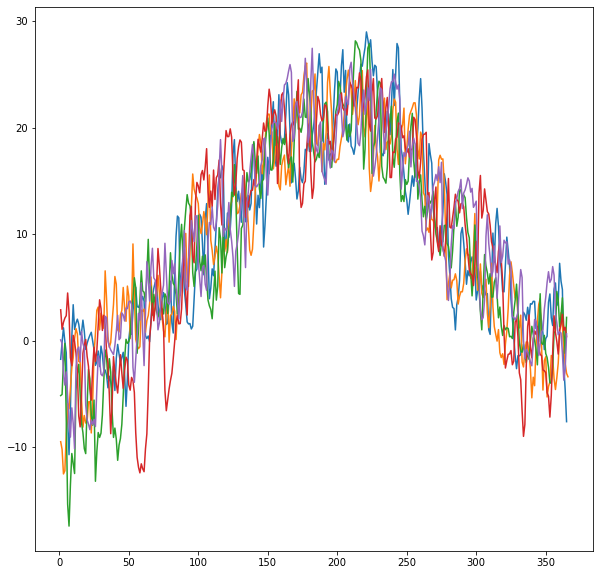

In [267]:
years = raw_data['YEAR'].unique()

for y in years:
    plt.plot('DAY_OF_YEAR','T2M',  data=raw_data.loc[raw_data.YEAR==y, :])
plt.draw()

as we can see the temperature for each year looks similar (as excepted),
that's why we will take 2019 as testing year

In [268]:
# print(raw_data[['YEAR']])

# raw_data = raw_data.loc[raw_data['YEAR'].isin((2015,2016,2017,2018))]

lets create monthly boxwise plot for training data, to see how different in each month temperature can be

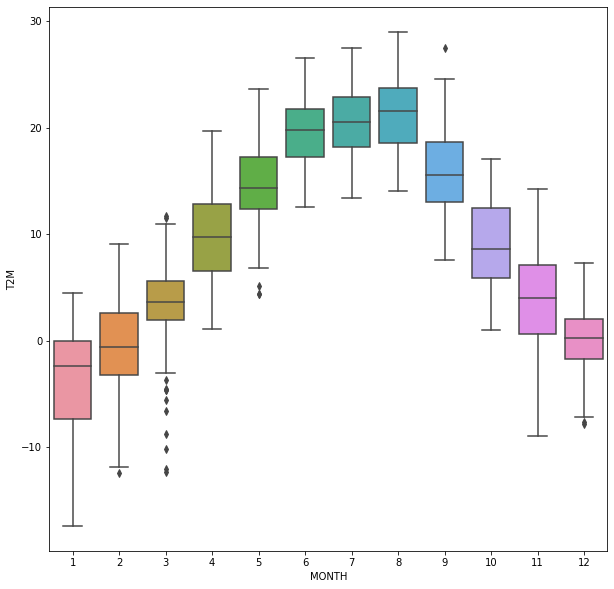

In [269]:
import seaborn as sns
months = raw_data['MONTH']
sns.boxplot(x='MONTH', y='T2M', data=raw_data)

as we can se there are similar temperature fluctuations in each month, especial on
fall and spring the values varies more. Only March and May was counted with outliers.

Also concluding from two above plots we deal with additive time series, mostly sesonal in context of year,
but trend and other factors may affect daily temperature

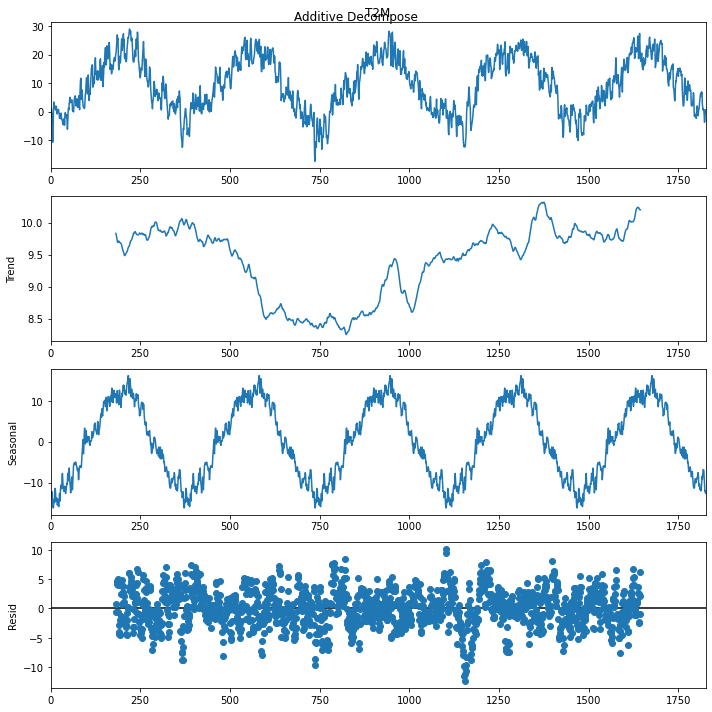

In [270]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(raw_data['T2M'], model='additive', period = 365)

# Plot
result_add.plot().suptitle('Additive Decompose')
plt.show()

In [271]:
# results_add.seasonal is the same for each year, thats why we add this to our dataframes
raw_data['SEASONAL'] = result_add.seasonal.iloc[:]
# raw_data = raw_data.drop(['index'], axis=1)
# print(raw_data_test)

as we can se residuals in additive decompose looks quite random which is good.
The sesonality has high values which indicates sezonal character of our data.


# stationary / non-stationary

Also we can see that T2M is function of time, at summer it will allways be higher then at winter.
Lets make differencing to make T2M stationary, the simplest way to make time-series stationary.

We know that linear regression works best if the predictors (X variables) are not correlated against each other.
So, stationarizing the series solves this problem since it removes any persistent autocorrelation,
thereby making the predictors(lags of the series) in the forecasting models nearly independent.

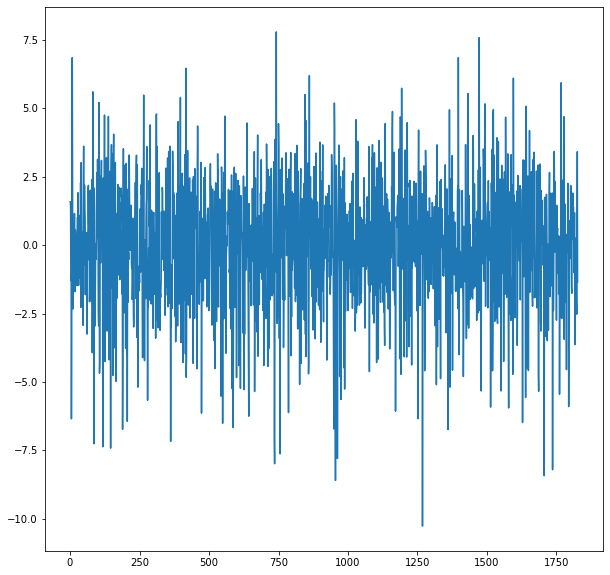

In [272]:
# differencing
raw_data['T2M_shift'] = raw_data['T2M'].shift(1)
raw_data['T2M_diff'] = raw_data['T2M'] - raw_data['T2M_shift']
raw_data = raw_data.drop(['T2M_shift'], axis = 1)

plt.plot(raw_data.T2M_diff)

as we can see 'T2M_diff' is stationary.

In [273]:
# lets remove apearing None values
raw_data = raw_data.dropna()

In [274]:
# The data is relatively checked. now we can save the data

import pickle
with open('raw_data.pkl', 'wb') as fp:
    pickle.dump(raw_data, fp)
